# K Vecinos Más Cercanos

# Importamos las librerias necesarias

In [1]:
import heapq ##Heap

from collections import Counter #Contador de ocurrencias
import operator #Para operaciones funcionales


from sklearn.datasets import make_classification #Generar datos aleatoriamente

# Uso de numpy

In [2]:
import numpy as np #Algebra Lineal

mat1 = np.random.randn(2, 3)
print(mat1.shape)

print(mat1)

(2, 3)
[[-0.38798754  0.59308567  1.89809659]
 [ 1.93444707 -1.51710165 -2.67669774]]


In [3]:
dimensiones = (5, 3, 2, 7)
mat2 = np.random.randn(*dimensiones)

print(mat2.shape)
print(mat2)

(5, 3, 2, 7)
[[[[-4.74613160e-02 -2.37128235e+00 -6.37922486e-01 -1.16789521e+00
    -4.70764256e-01 -2.29575427e+00  4.49990454e-01]
   [-1.39031109e+00 -6.06951455e-01 -1.52721538e-01 -3.44634723e-01
    -8.00485188e-01  1.51112632e-01 -7.79071730e-01]]

  [[ 1.34422823e-01  5.70225999e-01 -9.03849466e-01 -1.15617259e+00
    -8.45168084e-01 -5.13542082e-01  1.49738164e+00]
   [ 6.40820448e-02  1.54112500e+00 -5.75298033e-01  1.89349616e+00
    -9.52359513e-01 -5.69844838e-01  7.07166010e-01]]

  [[-4.74566534e-01  5.03534555e-01  3.28899523e-01 -1.60727727e+00
    -3.71175266e-03  2.29125477e+00  7.30396473e-01]
   [ 1.48133955e-01  3.36658213e-01  5.27728573e-01  7.48065546e-01
     8.08820684e-02 -5.63287529e-01  8.24703108e-01]]]


 [[[ 8.24861269e-02  4.95364272e-01  9.72537084e-01  1.20398858e+00
     7.80577772e-01 -1.29439614e+00  3.00493295e-01]
   [-5.16919968e-02 -1.34239149e+00  6.10096613e-01 -2.43349108e-01
    -1.96782138e+00  6.18512241e-01 -1.42617018e+00]]

  [[-1.93

# Uso de matplotlib

#### Podemos graficar el la matriz de (3,2) generada anteriormente

In [4]:
import matplotlib.pyplot as plt #Graficos

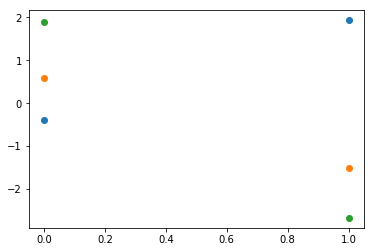

In [5]:
plt.plot(mat1, 'o')
plt.show()

# Definimos una funciona para simplifaar el código de la gráfica que necesitaremos

In [ ]:
def plot_dataset(X, Y):
    
    # Lila: 1, Amarillo: 0
    plt.scatter(X[:, 0], X[:, 1], 
            marker='o', 
            c=Y, #Coloreamos los puntos en base a la clase a la que pertenecen
            s=30, #Tamaño de los puntos
            edgecolors='k')

# Generamos un conjunto de datos aleatorio

In [ ]:
X, Y = make_classification(
    n_features=2, 
    n_redundant=0, 
    n_informative=1, 
    n_clusters_per_class=1)

In [ ]:
plot_dataset(X, Y)

# Cargamos un dataset que está mejor preparado

In [ ]:
X = np.load('X_knn.npy')
Y = np.load('Y_knn.npy')

In [ ]:
plot_dataset(X, Y)

# Generamos un punto aleatorio que será sobre el que haremos la predicción del KNN

In [ ]:
q = np.random.uniform(low=-1.6, 
                      high=2.1, 
                      size=(2))

print(q.shape)

print('Punto de consulta:', q[0])

In [ ]:
plot_dataset(X, Y)
plt.plot(q[0], q[1], 'ro')
plt.show()

### Implementamos KNN y la métrica a usar

$$\hat{d} = \sqrt{\sum_{i=1}^{\#dimensiones} (p_i - q_i)^2} $$

In [ ]:
def metrica(p1: list(), p2: list()):
    puntos = [(p, q) for p, q in zip(p1, p2)]
    return sum(map( lambda e: (e[0] - e[1])**2, puntos) )

![alt-text](img/pseudo.png)

In [ ]:
def knn(X, Y, query, k):
    """
    X: matriz de tamaño (n_muestras, n_caracteristicas).
    Y: vector con las clases correspondientes para cada muestra.
    query: punto de consulta de dimsensiones (n_caracteristicas, ).
    k: número de vecinos a considerar para la asignación de clases.
    """
    distancias = [(metrica(x, query), y) for x, y in zip(X, Y)]
    distancias = sorted(distancias, key=lambda e: e[0])
    
    # {clase1: ocurrencias, clase2: ocurrencias, ... }
    ocurrencias = list(Counter(e[1] for e in distancias[:k]).items())
    # [(clase1: ocurrencias), (clase2: ocurrencias), ... ]
    
    return sorted(ocurrencias, key=lambda e: -e[1])[0][0]

# Probamos nuestra implementación

In [ ]:
# 0: lila, 1: amarillo
q = np.random.uniform(low=-1.6, high=2.1, 
                      size=(2))

plot_dataset(X, Y)
plt.plot(q[0], q[1], 'ro')
plt.show()

In [ ]:
X_new = np.vstack((X, q))
pred = knn(X, Y, q, 10)
Y_new = np.hstack((Y, pred))

plot_dataset(X_new, Y_new)

# Usando Sklearn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier #Generador de datos

In [ ]:
model = KNeighborsClassifier(
    n_neighbors=10, 
    algorithm='brute')
model.fit(X, Y)

In [ ]:
reshaped_q = np.reshape(q, (1, -1))
print(reshaped_q.shape)

pred = model.predict(reshaped_q)
print(pred)

# Comparamos nuestras predicciones

In [ ]:
q = np.random.uniform(low=-1.6, high=2.1, size=(2))

In [ ]:
pred_1 = knn(X, Y, q, 10)

print('manual:', pred_1)

In [ ]:
reshaped_q = np.reshape(q, (1, -1))
pred_2 = model.predict(reshaped_q)[0]

print('sklearn: ', pred_2)

# Optimizaciones del KNN

In [ ]:
KNeighborsClassifier(n_neighbors=10, algorithm='ball_tree')

In [ ]:
KNeighborsClassifier(n_neighbors=10, algorithm='kd_tree')

# Resolviendo el dataset del Iris

![alt-text](img/Large53.jpg)
1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 
5. class: Iris Setosa, Iris Versicolour, Iris Virginica

In [ ]:
from sklearn.datasets import load_iris # Cargamos el dataset

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('iris.data', 
                   names=['sepal length in cm',
                          'sepal width in cm',
                          'petal length in cm', 
                          'petal width in cm',
                          'class'])

print(data.shape)

In [ ]:
data.head()

# Preparando los datos en sus respectivas matrices NUMÉRICAS

In [ ]:
X = data.drop(['class'], axis=1).values

print(X.shape)
print('-'*10)
print(X[:5, :])

In [ ]:
Y = pd.get_dummies(data['class']).values
Y = np.argmax(Y, axis=1)

print(Y.shape)
print('-'*10)
print(Y[:5])

pd.get_dummies(data['class']).head()

# Test Train Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Aplicamos nuestro modelo

In [ ]:
def knn_batch(X, Y, querys, k):
    predictions = [knn(X, Y, q, k) for q in querys]
    
    return predictions

In [ ]:
pred_manual = knn_batch(X_train, Y_train, X_test, 10)

print(accuracy_score(pred_manual, Y_test))
print(confusion_matrix(pred_manual, Y_test))

# Aplicamos Sklearn

In [ ]:
model = KNeighborsClassifier(n_neighbors=10, algorithm='kd_tree')
model.fit(X_train, Y_train)

pred_sk = model.predict(X_test)

print(accuracy_score(pred_sk, Y_test))
print(confusion_matrix(pred_sk, Y_test))